Trabalho de finanças I _ 21/7/24

Foi selecionado para a realização do trabalho os ativos arriscados listados na B3
- PETR3 - Petroleo Brasileiro
- VALE3 - Vale
- ITUB3 - Itau Unibanco
- ABEV3 - Ambev
- EMBR3 - Embraer
- SBSP3 - Sabesp
- YDUQ3 - Yduqs

Foi selecionado a selic como ativo riskfree, medida de 6/23 até 6/24
Taxa Selic - aprox 12% aa 


In [149]:
#Bibliotecas gerais

import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [102]:
#Definindo ativos 

t0 = "2023-06-01"
t1 = "2024-06-01"
ativos = ["ABEV3.SA", "PETR3.SA", "VALE3.SA", "ITUB3.SA", "EMBR3.SA", "SBSP3.SA", "YDUQ3.SA"]
tab_close = yf.download(ativos, start=t0, end=t1)['Adj Close'].dropna()
print(tab_close)



[*********************100%%**********************]  7 of 7 completed

Ticker       ABEV3.SA   EMBR3.SA   ITUB3.SA   PETR3.SA   SBSP3.SA   VALE3.SA  \
Date                                                                           
2023-06-01  13.532650  19.459999  20.749079  24.097908  51.387646  59.948402   
2023-06-02  13.741722  19.490000  21.024633  24.386505  52.183517  62.506050   
2023-06-05  13.694205  19.450001  21.235891  24.538820  51.328693  61.990841   
2023-06-06  14.083839  19.549999  21.300186  25.035851  52.812351  62.193237   
2023-06-07  14.112350  19.240000  21.309370  25.813461  52.380028  63.177662   
...               ...        ...        ...        ...        ...        ...   
2024-05-24  11.870000  37.680000  27.422029  37.292374  75.610001  65.080002   
2024-05-27  11.810000  38.150002  27.402042  37.672016  75.070000  65.300003   
2024-05-28  11.590000  37.169998  27.332088  38.333954  74.629997  63.889999   
2024-05-29  11.520000  36.650002  27.192179  38.421562  74.690002  63.240002   
2024-05-31  11.560000  36.230000  26.932

In [255]:
#Visão geral valores
estatisticas = tab_close.describe().T
estatisticas


,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
ABEV3.SA,249.0,13.075535,0.794887,11.520000,12.440000,12.971957,13.694205,14.777578
EMBR3.SA,249.0,23.043574,6.217807,16.670000,18.230000,20.549999,25.879999,39.560001
ITUB3.SA,249.0,25.109434,2.886514,20.749079,22.193382,24.970531,27.733883,29.883434
PETR3.SA,249.0,33.907624,4.124338,24.097908,31.089476,33.860847,37.137699,43.288746
SBSP3.SA,249.0,66.977711,10.453526,51.328693,57.695652,66.509178,77.592400,83.477905
VALE3.SA,249.0,64.289946,3.642880,57.861610,61.860001,63.628479,65.908211,74.085999
YDUQ3.SA,249.0,18.777617,2.388823,12.110000,17.884298,19.294760,20.473667,23.289375


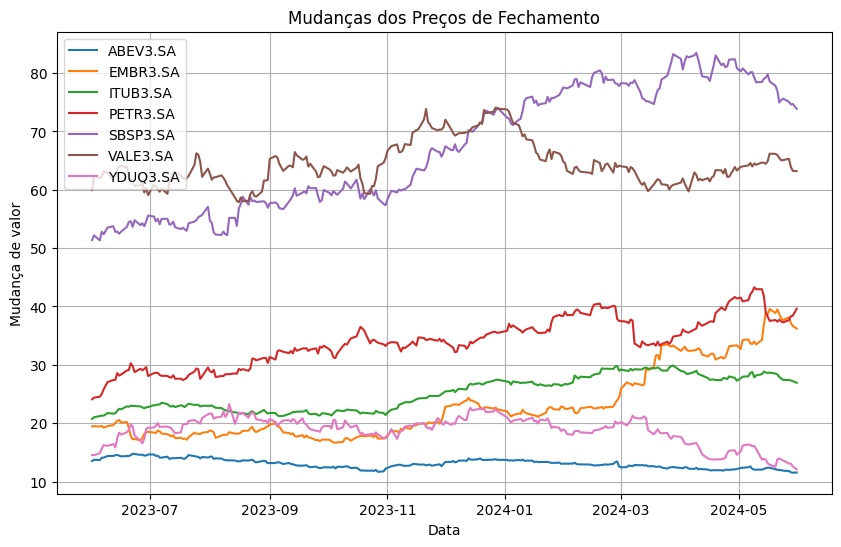

In [103]:
# Gráfico mudança de preços ao longo dos 12 meses
plt.figure(figsize=(10, 6))
for coluna in tab_close.columns:
    plt.plot(tab_close.index, tab_close[coluna], label=coluna)

plt.title('Mudanças dos Preços de Fechamento')
plt.xlabel('Data')
plt.ylabel('Mudança de valor')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [256]:
#Mudança % dos preços de fechamento 

tab_deltapercent_close = tab_close.pct_change()
print(tab_deltapercent_close)


Ticker      ABEV3.SA  EMBR3.SA  ITUB3.SA  PETR3.SA  SBSP3.SA  VALE3.SA  \
Date                                                                     
2023-06-01       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-02  0.015449  0.001542  0.013280  0.011976  0.015488  0.042664   
2023-06-05 -0.003458 -0.002052  0.010048  0.006246 -0.016381 -0.008243   
2023-06-06  0.028452  0.005141  0.003028  0.020255  0.028905  0.003265   
2023-06-07  0.002024 -0.015857  0.000431  0.031060 -0.008186  0.015828   
...              ...       ...       ...       ...       ...       ...   
2024-05-24 -0.007525 -0.007638 -0.008670 -0.003382  0.003317  0.000461   
2024-05-27 -0.005055  0.012473 -0.000729  0.010180 -0.007142  0.003380   
2024-05-28 -0.018628 -0.025688 -0.002553  0.017571 -0.005861 -0.021593   
2024-05-29 -0.006040 -0.013990 -0.005119  0.002285  0.000804 -0.010174   
2024-05-31  0.003472 -0.011460 -0.009555  0.031163 -0.011113 -0.000633   

Ticker      YDUQ3.SA  
Date          

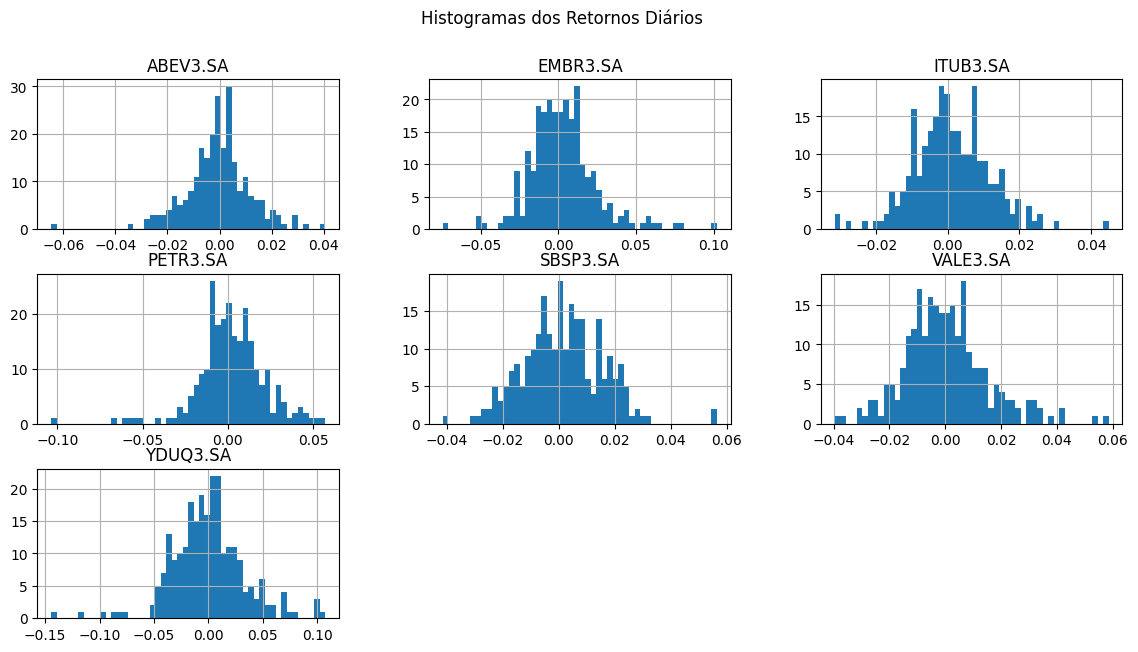

In [225]:
# Histogramas dos retornos
tab_deltapercent_close.hist(bins=50, figsize=(14, 7))
plt.suptitle('Histogramas dos Retornos Diários')
plt.show()

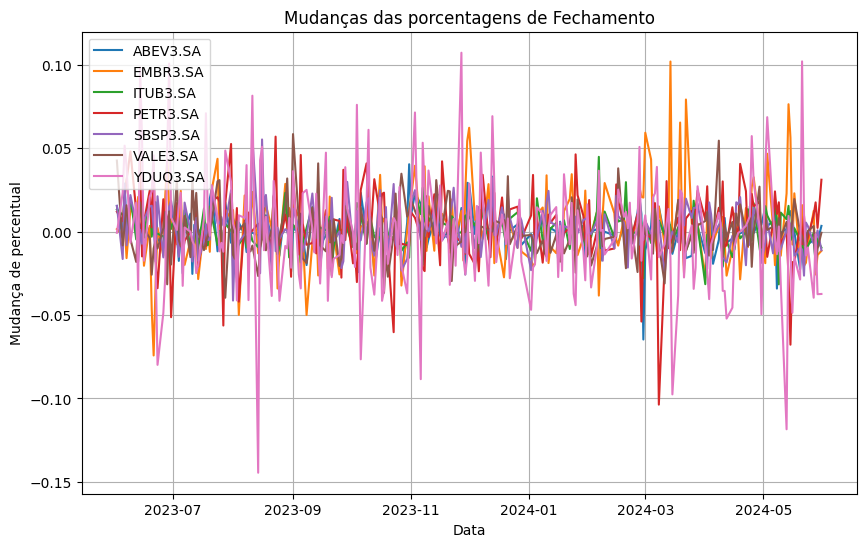

In [198]:
# Gráfico mudança de preços ao longo dos 12 meses
plt.figure(figsize=(10, 6))
for coluna in tab_deltapercent_close.columns:
    plt.plot(tab_deltapercent_close.index, tab_deltapercent_close[coluna], label=coluna)

plt.title('Mudanças das porcentagens de Fechamento')
plt.xlabel('Data')
plt.ylabel('Mudança de percentual')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [56]:
#DP

desvio_padrao = tab_deltapercent_close.std()
print('DP =', desvio_padrao)

dp_abev = desvio_padrao['ABEV3.SA']
dp_petr = desvio_padrao['PETR3.SA']
dp_vale = desvio_padrao['VALE3.SA']
dp_itub = desvio_padrao['ITUB3.SA']
dp_embr = desvio_padrao['EMBR3.SA']
dp_sbsp = desvio_padrao['SBSP3.SA']
dp_yduq = desvio_padrao['YDUQ3.SA']

#Variancia

print('VAR =', desvio_padrao*desvio_padrao)
var_petr = dp_petr*dp_petr
var_vale = dp_vale*dp_vale
var_itub = dp_itub*dp_itub
var_abev = dp_abev*dp_abev
var_embr = dp_embr*dp_embr
var_sbsp = dp_sbsp*dp_sbsp
var_yduq = dp_yduq*dp_yduq



DP = Ticker
ABEV3.SA    0.012209
EMBR3.SA    0.021485
ITUB3.SA    0.010552
PETR3.SA    0.019807
SBSP3.SA    0.014164
VALE3.SA    0.015019
YDUQ3.SA    0.033667
dtype: float64
VAR = Ticker
ABEV3.SA    0.000149
EMBR3.SA    0.000462
ITUB3.SA    0.000111
PETR3.SA    0.000392
SBSP3.SA    0.000201
VALE3.SA    0.000226
YDUQ3.SA    0.001133
dtype: float64


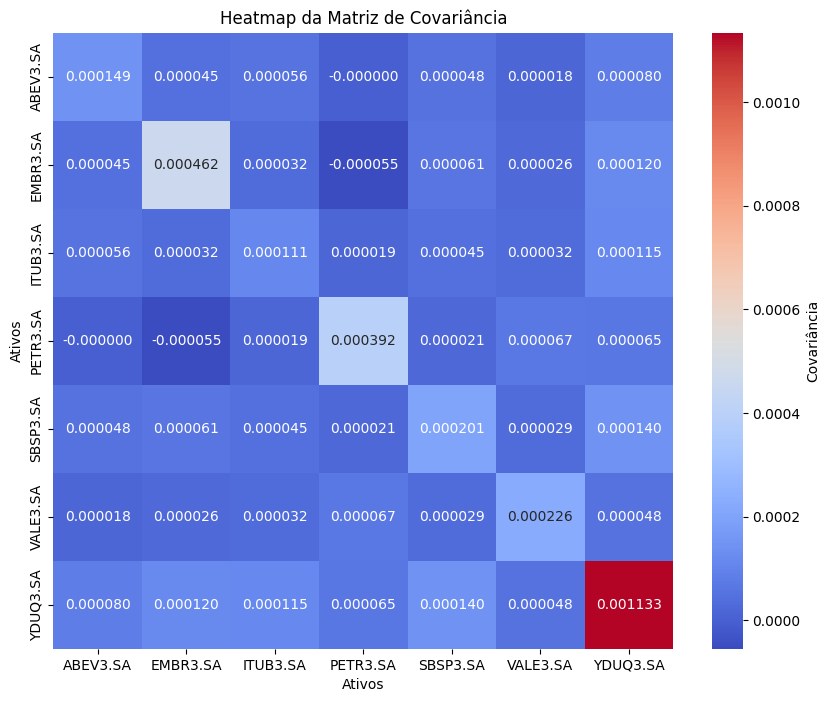

In [147]:

cov = tab_deltapercent_close.cov()

plt.figure(figsize=(10, 8))
sns.heatmap(cov, annot=True, fmt='.6f', cmap='coolwarm', cbar_kws={'label': 'Covariância'})

plt.title('Heatmap da Matriz de Covariância')
plt.xlabel('Ativos')
plt.ylabel('Ativos')

plt.show()


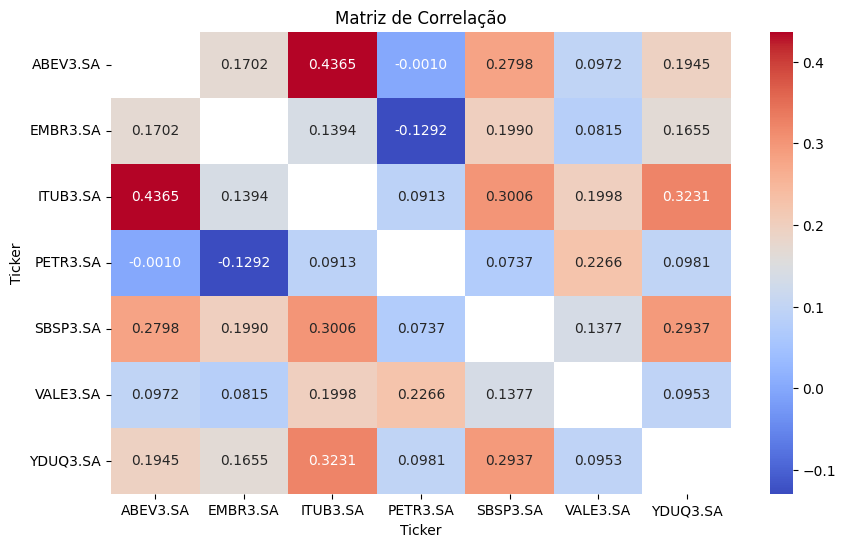

In [257]:
#Correlação
correlation_matrix = tab_deltapercent_close.corr()
np.fill_diagonal(correlation_matrix.values, np.nan)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title("Matriz de Correlação")
plt.show()


In [79]:

#Criando listas para serem preenchidas
n_carteiras = 200000
lista_retornos = []
lista_volatilidade = []
lista_sharpe = []
lista_pesos = []
riskfree = 0.12 #Valor médio da selic

#Repetição preenchendo listas
for i in range (n_carteiras):
    pesos = np.random.random(len(ativos))
    pesos /= np.sum(pesos)
    retornos = np.dot(pesos,tab_deltapercent_close.mean())*249
    volatilidade = np.sqrt(np.sum(pesos**2*tab_deltapercent_close.var()*249))
    sharpe = ((retornos)-(riskfree))/volatilidade
    lista_retornos.append(retornos)
    lista_volatilidade.append(volatilidade)
    lista_sharpe.append(sharpe)
    lista_pesos.append(pesos)



In [80]:
#Definição do portfolio
portfolio = pd.DataFrame({'Retorno Esperado': lista_retornos, 'Risco da Carteira': lista_volatilidade, 'Sharpe': lista_sharpe,
                          'Alocação dos Ativos na Ordem Escolhida': lista_pesos})
portfolio

,Retorno Esperado,Risco da Carteira,Sharpe,Alocação dos Ativos na Ordem Escolhida
0,0.280515,0.132430,1.212069,"[0.0907674885555825, 0.2755010665914902, 0.154..."
1,0.121524,0.164705,0.009253,"[0.14120170365738513, 0.06719828475602733, 0.2..."
2,0.363248,0.122227,1.990139,"[0.0680233514436034, 0.21109809343159677, 0.05..."
3,0.192867,0.120736,0.603522,"[0.05093728727039227, 0.001286329049686583, 0...."
4,0.276163,0.149559,1.044156,"[0.03136514426253799, 0.1430785608100812, 0.14..."
...,...,...,...,...
199995,0.306424,0.139944,1.332137,"[0.07258276207068151, 0.2211466913404194, 0.08..."
199996,0.174067,0.137786,0.392400,"[0.22552294309928791, 0.00839561698179291, 0.1..."
199997,0.352363,0.128453,1.808930,"[0.1068248082283058, 0.08880922373118923, 0.10..."
199998,0.319796,0.161617,1.236230,"[0.14807447104338842, 0.09551252269583567, 0.0..."


In [258]:
#Carteiras únicas

resultados_carteiras = []

for ativo in ativos:
    retorno_carteira = tab_deltapercent_close[ativo].mean() * 249

    volatilidade_carteira = tab_deltapercent_close[ativo].std() * np.sqrt(249)

    sharpe_carteira = (retorno_carteira - riskfree) / volatilidade_carteira

    resultados_carteiras.append((ativo, retorno_carteira, volatilidade_carteira, sharpe_carteira))


for resultado in resultados_carteiras:
    print("Ativo:", resultado[0])
    print("Retorno da Carteira:", resultado[1])
    print("Volatilidade da Carteira:", resultado[2])
    print("Sharpe da Carteira:", resultado[3])
    print()


Ativo: ABEV3.SA
Retorno da Carteira: -0.13957386647777065
Volatilidade da Carteira: 0.19266030892832656
Sharpe da Carteira: -1.3473136626929072

Ativo: PETR3.SA
Retorno da Carteira: 0.5487614267458021
Volatilidade da Carteira: 0.31254358571432084
Sharpe da Carteira: 1.3718452284530636

Ativo: VALE3.SA
Retorno da Carteira: 0.08083844728070487
Volatilidade da Carteira: 0.2370012922882804
Sharpe da Carteira: -0.16523771807817964

Ativo: ITUB3.SA
Retorno da Carteira: 0.2757871901026217
Volatilidade da Carteira: 0.16650100516772032
Sharpe da Carteira: 0.9356531508364989

Ativo: EMBR3.SA
Retorno da Carteira: 0.681332208397913
Volatilidade da Carteira: 0.33902323451691047
Sharpe da Carteira: 1.655733741074651

Ativo: SBSP3.SA
Retorno da Carteira: 0.38928153288839606
Volatilidade da Carteira: 0.22350298717957412
Sharpe da Carteira: 1.2048229703169069

Ativo: YDUQ3.SA
Retorno da Carteira: -0.042224931665442424
Volatilidade da Carteira: 0.5312542926818008
Sharpe da Carteira: -0.30536210982225115

Text(0.5, 1.0, 'Gráfico de Markowitz')

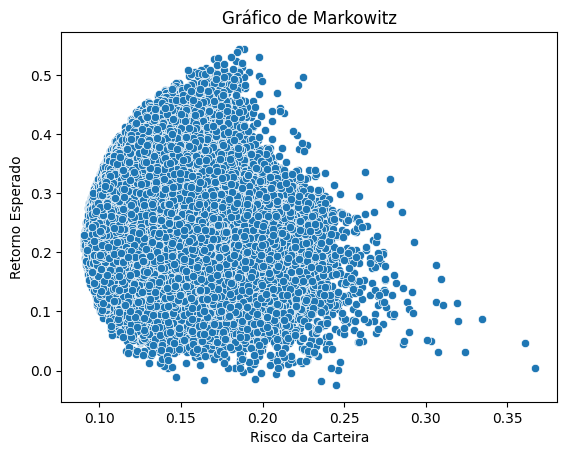

In [152]:
sns.scatterplot(x ="Risco da Carteira", y ="Retorno Esperado", data=portfolio).set_title("Gráfico de Markowitz")

In [97]:
#Sharpe

maior_sharpe = portfolio['Sharpe'].max()
print(maior_sharpe)

linha_do_maior_sharpe = portfolio['Sharpe'].tolist().index(maior_sharpe)
peso_do_maior_sharpe = portfolio['Alocação dos Ativos na Ordem Escolhida'][linha_do_maior_sharpe]
peso_do_maior_sharpe = peso_do_maior_sharpe*100
peso_do_maior_sharpe = [f'{peso:.2f}%' for peso in peso_do_maior_sharpe]

2.5913387141769166


In [105]:
#Melhor retorno

melhor_retorno = portfolio['Retorno Esperado'][linha_do_maior_sharpe]
melhor_retorno

0.44321744134308

In [202]:
#Melhor risco

melhor_risco = portfolio['Risco da Carteira'][linha_do_maior_sharpe]
melhor_risco



0.12472990874361367

In [208]:
#Carteira de mercado

melhores_dados = [melhor_retorno, melhor_risco, maior_sharpe] 
melhor_carteira = pd.DataFrame([melhores_dados], index = ['Melhor Carteira'], columns = ['Retorno Esperado', 'Risco da Carteira', 'Sharpe'])
melhor_carteira

,Retorno Esperado,Risco da Carteira,Sharpe
Melhor Carteira,0.443217,0.12473,2.591339


In [212]:
#Menor variância

menor_var = portfolio['Risco da Carteira'].min()

linha_minvar = portfolio['Risco da Carteira'].tolist().index(menor_var)

retorno_minvar = portfolio['Retorno Esperado'][linha_minvar]
sharpe_minvar = portfolio['Sharpe'][linha_minvar]

dados_minvar = [retorno_minvar,menor_var, sharpe_minvar] 
carteira_minvar = pd.DataFrame([dados_minvar], index = ['Carteira minima variancia'], columns = ['Retorno Esperado', 'Risco da Carteira', 'Sharpe'])
carteira_minvar


,Retorno Esperado,Risco da Carteira,Sharpe
Carteira minima variancia,0.205634,0.090456,0.946694


                 ABEV3.SA PETR3.SA VALE3.SA ITUB3.SA EMBR3.SA SBSP3.SA  \
Alocação min var   23.36%    7.53%   27.46%    8.01%   14.10%   16.72%   

                 YDUQ3.SA  
Alocação min var    2.81%  


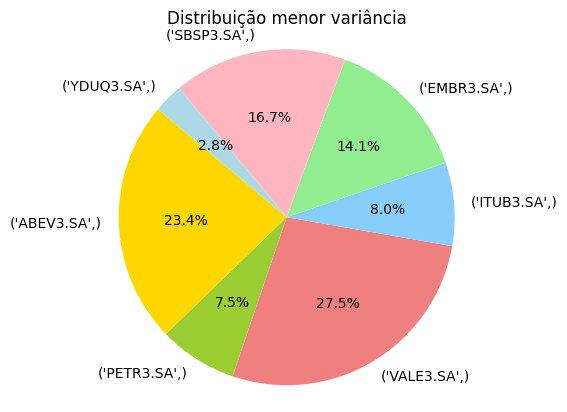

In [213]:
#Distribuição carteira minima variância

#sharpe minvar
peso_sharpe_minvar = portfolio['Alocação dos Ativos na Ordem Escolhida'][linha_minvar]
peso_sharpe_minvar = peso_sharpe_minvar*100
peso_sharpe_minvar = [f'{peso:.2f}%' for peso in peso_sharpe_minvar]


distribuicao_minvar = pd.DataFrame([peso_sharpe_minvar], index = ['Alocação min var'], columns = [ativos])
print(distribuicao_minvar)

distribuicao_minvar = distribuicao_minvar.replace('%', '', regex=True).astype(float)
labels = distribuicao_minvar.columns
sizes = distribuicao_minvar.loc['Alocação min var']

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink', 'lightblue']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=False, startangle=140)

ax.axis('equal')  

plt.title('Distribuição menor variância')
plt.show()

                ABEV3.SA PETR3.SA VALE3.SA ITUB3.SA EMBR3.SA SBSP3.SA YDUQ3.SA
Melhor Alocação    0.37%   20.09%   32.70%   23.61%   22.36%    0.33%    0.54%


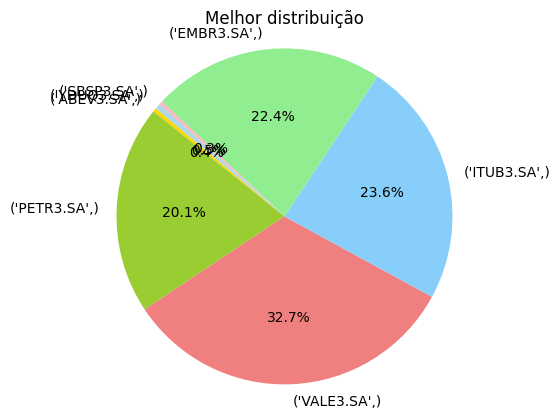

In [191]:
#Melhor distribuição

melhor_distribuicao = pd.DataFrame([peso_do_maior_sharpe], index = ['Melhor Alocação'], columns = [ativos])
print(melhor_distribuicao)

melhor_distribuicao = melhor_distribuicao.replace('%', '', regex=True).astype(float)
labels = melhor_distribuicao.columns
sizes = melhor_distribuicao.loc['Melhor Alocação']

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink', 'lightblue']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=False, startangle=140)

ax.axis('equal')  

plt.title('Melhor distribuição')
plt.show()

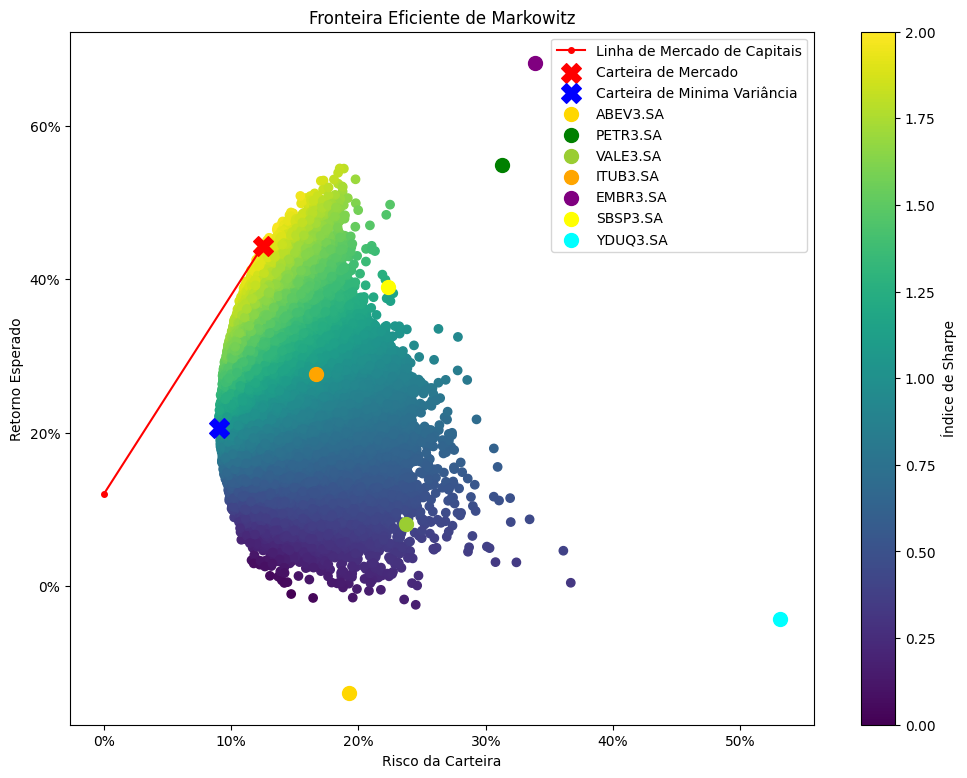

In [222]:
lista_da_volatilidade = np.array(lista_volatilidade)
lista_de_retornos = np.array(lista_retornos)
lista_do_sharpe = np.array(lista_sharpe)

fig, ax = plt.subplots(figsize=(12,9))

def porcentagem_formatter(x, pos):
    return f'{int(x*100)}%'
plt.scatter(lista_da_volatilidade, lista_de_retornos, c=lista_do_sharpe, marker='o')
plt.scatter(portfolio['Risco da Carteira'][linha_do_maior_sharpe], portfolio['Retorno Esperado'][linha_do_maior_sharpe], c = "red", marker='o')
plt.plot([0, melhor_risco], [riskfree, melhor_retorno], color='red', marker='o', markersize=4, label='Linha de Mercado de Capitais')
plt.title('Fronteira Eficiente de Markowitz')
plt.legend()
plt.xlabel('Risco da Carteira')
plt.ylabel('Retorno Esperado')

plt.clim(0.0, 2)
colorbar = plt.colorbar(label='Índice de Sharpe')

ax.scatter(portfolio['Risco da Carteira'][linha_do_maior_sharpe], 
           portfolio['Retorno Esperado'][linha_do_maior_sharpe], 
           color='red', 
           marker='X',  
           s=200,  
           label='Carteira de Mercado')

ax.scatter(portfolio['Risco da Carteira'][linha_minvar], 
           portfolio['Retorno Esperado'][linha_minvar], 
           color='blue', 
           marker='X', 
           s=200, 
           label='Carteira de Minima Variância')


cores = ['gold', 'green', 'yellowgreen', 'orange', 'purple', 'yellow', 'cyan']
for i, resultado in enumerate(resultados_carteiras):
    retorno = resultado[1]
    volatilidade = resultado[2]
    ax.scatter(volatilidade, retorno, color=cores[i], marker='o', s=100, label=resultado[0])

# Adicionar a legenda
ax.legend()

ax.xaxis.set_major_formatter(FuncFormatter(porcentagem_formatter))
ax.yaxis.set_major_formatter(FuncFormatter(porcentagem_formatter))

plt.show()

[*********************100%%**********************]  1 of 1 completed


Date
2023-06-01    107.199997
2023-06-02    109.019997
2023-06-05    109.139999
2023-06-06    111.070000
2023-06-07    111.779999
                 ...    
2024-05-24    120.639999
2024-05-27    120.870003
2024-05-28    120.180000
2024-05-29    119.120003
2024-05-31    118.660004
Name: Adj Close, Length: 249, dtype: float64


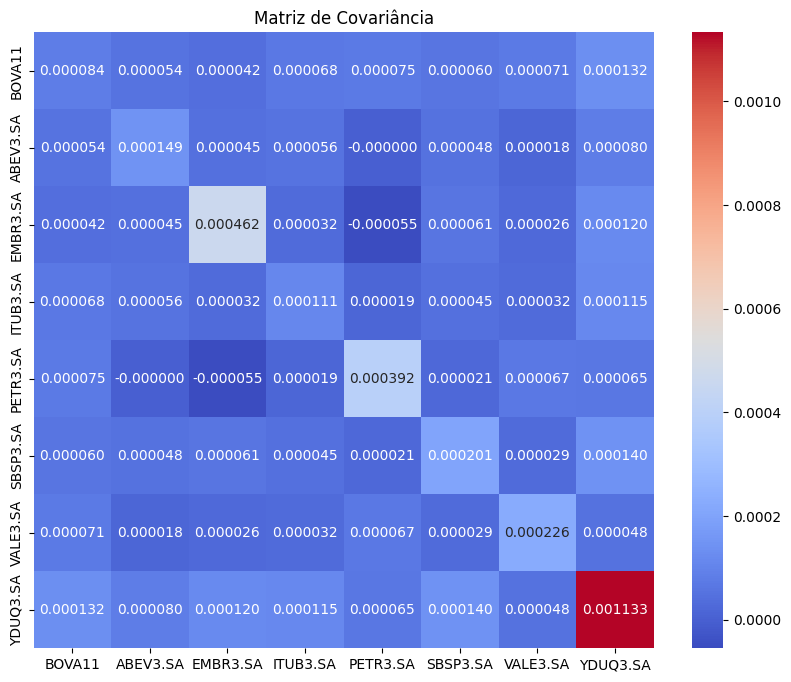

In [254]:
#Covariancia empresas e ibovespa

bova = ["BOVA11.SA"]
bova_close = yf.download(bova, start=t0, end=t1)['Adj Close'].dropna()
print(bova_close)

df_close = pd.concat([bova_close, tab_close], axis=1, join='inner')
df_close.rename(columns={'Adj Close': 'BOVA11'}, inplace=True)

returns = df_close.pct_change().dropna()


covariance_matrix = returns.cov()
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".6f", annot_kws={"size": 10})
plt.title('Matriz de Covariância')
plt.show()


[*********************100%%**********************]  1 of 1 completed


Date
2023-06-01    107.199997
2023-06-02    109.019997
2023-06-05    109.139999
2023-06-06    111.070000
2023-06-07    111.779999
                 ...    
2024-05-24    120.639999
2024-05-27    120.870003
2024-05-28    120.180000
2024-05-29    119.120003
2024-05-31    118.660004
Name: Adj Close, Length: 249, dtype: float64


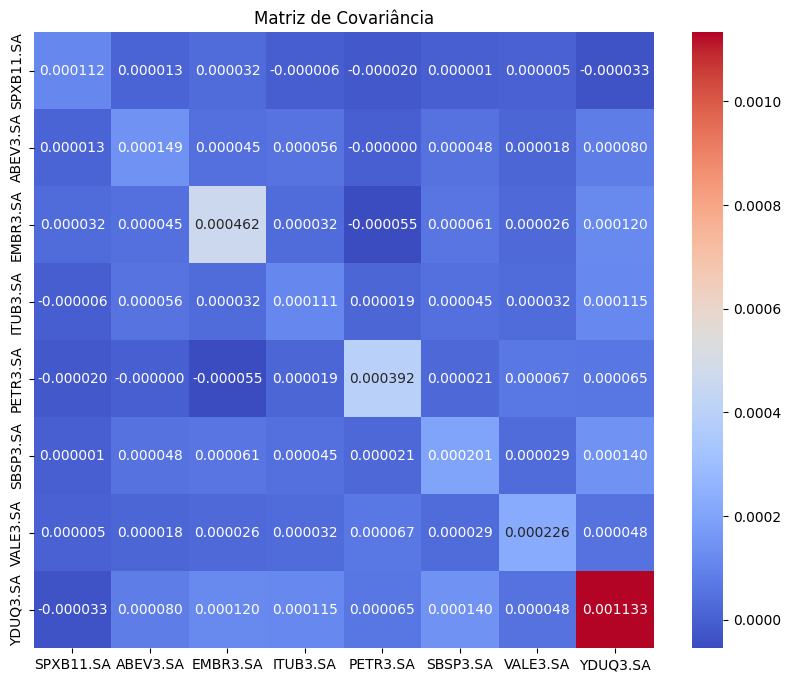

In [259]:
#Covariancia empresas e S&P500

sep500 = ["SPXB11.SA"]
sep500_close = yf.download(sep500, start=t0, end=t1)['Adj Close'].dropna()
print(bova_close)

df_close = pd.concat([sep500_close, tab_close], axis=1, join='inner')
df_close.rename(columns={'Adj Close': 'SPXB11.SA'}, inplace=True)

returns = df_close.pct_change().dropna()


covariance_matrix = returns.cov()
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".6f", annot_kws={"size": 10})
plt.title('Matriz de Covariância')
plt.show()

KeyError: "None of [Index([('A', 'B', 'E', 'V', '3', '.', 'S', 'A'),\n       ('E', 'M', 'B', 'R', '3', '.', 'S', 'A'),\n       ('I', 'T', 'U', 'B', '3', '.', 'S', 'A'),\n       ('P', 'E', 'T', 'R', '3', '.', 'S', 'A'),\n       ('S', 'B', 'S', 'P', '3', '.', 'S', 'A'),\n       ('V', 'A', 'L', 'E', '3', '.', 'S', 'A'),\n       ('Y', 'D', 'U', 'Q', '3', '.', 'S', 'A')],\n      dtype='object')] are in the [index]"